In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_Customers.csv')

df.rename(index=str, columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'},inplace=True)

In [3]:
X = df.loc[:, ('Income', 'Score')]

In [4]:
fig = plt.figure(figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'KMeans with 5 Clusters')

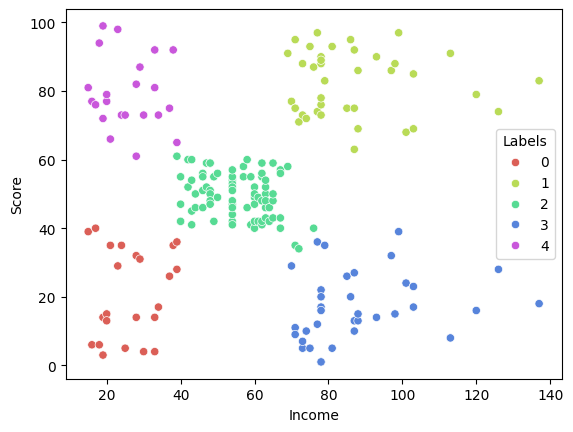

In [8]:
from sklearn.cluster import KMeans

km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
ax = fig.add_subplot(221)
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],
palette=sns.color_palette('hls', 5))
ax.set_title('KMeans with 5 Clusters')

Text(0.5, 1.0, 'Agglomerative with 5 Clusters')

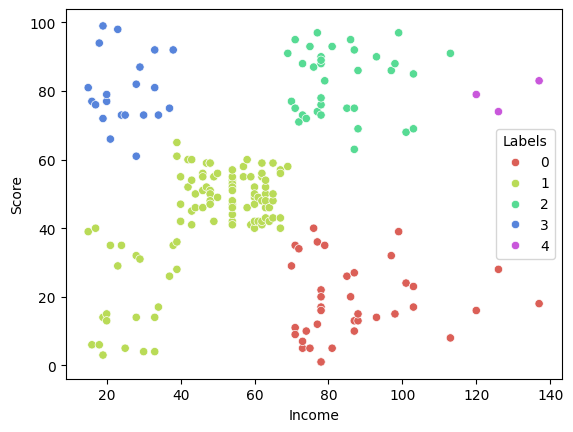

In [9]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
ax = fig.add_subplot(222)
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
ax.set_title('Agglomerative with 5 Clusters')

Text(0.5, 1.0, 'DBSCAN with epsilon 11, min samples 6')

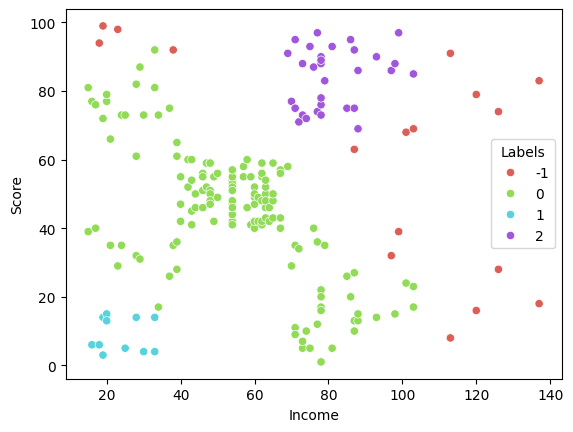

In [10]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=11, min_samples=6).fit(X)

ax = fig.add_subplot(223)
X['Labels'] = db.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls',
np.unique(db.labels_).shape[0]))
ax.set_title('DBSCAN with epsilon 11, min samples 6')

In [12]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X)
X['Labels'] = ms.labels_
ax = fig.add_subplot(224)
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], style=X['Labels'], s=60, palette=sns.color_palette('hls',np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

Text(0.5, 1.0, 'MeanShift')

In [14]:
# 4. Hiển thị đồ thị
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>